# STAT207 Final Project - Predictive Analysis on Obesity


Idunnuoluwa Akinola, Zach Goldstein, Anh Do

## 1. Introduction

According to the WHO, "Rates of overweight and obesity continue to grow in adults and children. From 1975 to 2016, the prevalence of overweight or obese children and adolescents aged 5–19 years increased more than four-fold from 4% to 18% globally" (WHO, 2020). The prevalence of obesity is the result of certain factors which include lifestyle, diet, physical activties and broader environment (Mayo Clinic, 2023). Changes in work, transportation, and leisure activities have led to more sedentary lifestyles. Desk jobs, reliance on cars, and increased screen time contribute to a lack of physical activity. Some individuals may have a genetic predisposition to obesity, making it more challenging for them to maintain a healthy weight. A model that predicts whether a person may be at risk for obesity for new datasets would help those affected seek preventative treatment.

We are going to explore a dataset about certain factors that contribute to obesity. The goal of exploring this dataset is to create a predictive model that will predict family history with obesity for new datasets using:
* Weight
* Frequency of consumption of vegetables (FCVC)
* Physical activity frequency (FAF)
* Number of main meals (NCP), and
* Frequent consumption of high caloric food (FAVC)

Scientist, nutritionist, doctors and individuals will find this model very useful because it will help them pinpoint common causes of obesity and come up with more effective treatments and preventataive measures. These groups would prefer a classifier that is equally good at classifying positives and negatives because poor performance for either could cause undetected health conditions or medical overtreatment. We would also like our chosen model to provide reliable interpretative insights about the nature of the relationship between the variables in the dataset.

----

**Citations**

Mayo Clinic. (2023, July 22). Obesity - Symptoms and causes - Mayo Clinic. Retrieved December 5, 2023, from https://www.mayoclinic.org/diseases-conditions/obesity/symptoms-causes/syc-20375742 

WHO. (2020, February 21). Obesity. Retrieved December 5, 2023, from https://www.who.int/health-topics/obesity#tab=tab_1

## 2. Dataset Discussion

The data consists of the estimation of obesity levels in people from Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical conditions - each row represents data collected from one person. The data was collected through a web survey where anonymous users answered questions relating to attributes like Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), and Physical activity frequency (FAF). The dataset is not inclusive of all possible types of observations since data was only collected from one region of the world which may have specific eating habits not reflected elsewhere, leaving out populations from other continents. The dataset was downloaded on 12/04/23 from Kaggle (https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data). Since only one population is represented, the people in our research motivation will have to conduct more research or adjust for their own demographic before drawing conclusions from model predictions. 

We will use family_history_with_overweight, which indicates whether the responder has/had a family member who suffers/suffered from overweight, which is correlated with obesity risk, as our response variable and the following explanatory variables:
* **Weight**: weight of the person surveighed in kilograms
* **Frequency of consumption of vegetables (FCVC)**: number of vegetables consumed per day
* **Physical activity frequency (FAF)**: number of times per week person engages in physical activity
* **Number of main meals (NCP)**: number of main meals eaten per day
* **Frequent consumption of high caloric food (FAVC)**: whether the person frequently consumes high caloric food (yes/no)

We chose to focus on these explanatory variables as they relate to diet quality and physical condition, which are very relevant to obesity.

In [156]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

In [157]:
df=pd.read_csv("ObesityDataSet.csv")
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [158]:
original_row_num=df.shape[0]
print("Rows before data cleaning: " + str(original_row_num))

Rows before data cleaning: 2111


In [159]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 3. Dataset Cleaning

We only intend to use family history with overweight, Frequency of consumption of vegetables (FCVC), Physical activity frequency (FAF), Number of main meals (NCP), weight and Frequent consumption of high caloric food (FAVC). After looking at the dataset with the selected variables that we desire to use, we can say that the dataset does not have any implicit missing values as all data types are consistent and neither binary variables contain a third value. Therefore, we didn't need to drop any rows. Our categorical explanatory variable has enough observations for every level, so we didn't drop any rows. 

We did detect outliers in our scatterplots and confirmed them using the outlier formula. The main pro of dropping these outliers is reducing data skewing due to extreme values, and the main con is losing potentially meaninful data points. Because there was a large number of outliers and we wanted to keep as much meaningful data as possible, we did not drop the outliers. Our number of rows remains the same.

We did not discover any other data cleaning ideas that would improve the answer to our research question.

In [160]:
# constants for easy access to variables
NUMERICAL_VARS = ['FCVC', 'NCP', 'FAF', 'Weight']
CATEGORICAL_VAR = 'FAVC'
RESPONSE_VAR = 'family_history_with_overweight'

In [161]:
# filter columns
df = df[[RESPONSE_VAR] + [CATEGORICAL_VAR] + NUMERICAL_VARS]
df

,family_history_with_overweight,FAVC,FCVC,NCP,FAF,Weight
0,yes,no,2.0,3.0,0.000000,64.000000
1,yes,no,3.0,3.0,3.000000,56.000000
2,yes,no,2.0,3.0,2.000000,77.000000
3,no,no,3.0,3.0,2.000000,87.000000
4,no,no,2.0,1.0,0.000000,89.800000
...,...,...,...,...,...,...
2106,yes,yes,3.0,3.0,1.676269,131.408528
2107,yes,yes,3.0,3.0,1.341390,133.742943
2108,yes,yes,3.0,3.0,1.414209,133.689352
2109,yes,yes,3.0,3.0,1.139107,133.346641


**Missing value detection**

In [162]:
# all datatypes are consistent with the datatype that values are supposed to be
df.dtypes

family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
FAF                               float64
Weight                            float64
dtype: object

In [163]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [164]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

**Sample size cleaning**

In [165]:
# categorical explanatory variable has large number of observations for every value
print(df[df['FAVC'] == 'yes'].shape[0])
print(df[df['FAVC'] == 'no'].shape[0])

1866
245


**Outlier cleaning**

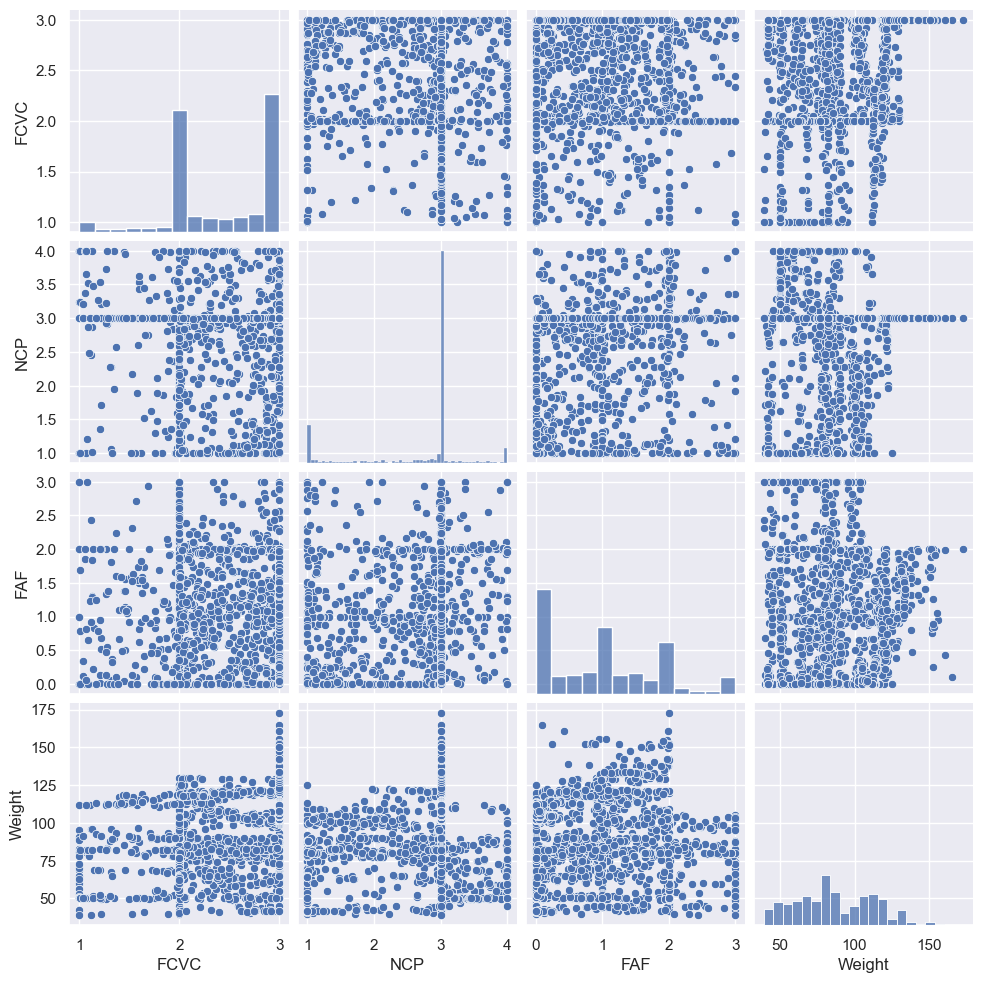

In [166]:
sns.pairplot(df)

In [167]:
# finding outliers using formula
outliers = set()
for variable in NUMERICAL_VARS:
    q1, q3 = df[variable].quantile(0.25), df[variable].quantile(0.75)
    iqr = q3 - q1
    outliers.update(set(df[(df[variable] > q3 + 1.5 * iqr) | (df[variable] < q1 - 1.5 * iqr)].index))
df.iloc[list(outliers)]

,family_history_with_overweight,FAVC,FCVC,NCP,FAF,Weight
4,no,no,2.000000,1.000000,0.000000,89.800000
14,yes,yes,3.000000,1.000000,1.000000,60.000000
16,yes,yes,2.000000,1.000000,1.000000,102.000000
17,no,yes,2.000000,1.000000,0.000000,78.000000
18,yes,yes,3.000000,4.000000,0.000000,82.000000
...,...,...,...,...,...,...
1794,yes,yes,2.919526,2.142328,0.958555,102.583895
1795,yes,yes,2.724121,1.437959,0.029603,105.580491
1796,yes,yes,2.801992,1.343117,0.233987,101.067988
1797,yes,yes,2.748971,1.213431,0.128548,104.321463


## 4. Preliminary Analysis

**Relationships between response and explanatory variables**

FAVC (Frequent consumption of high caloric food), NCP (Number of main meals) and Weight have strong relationships with the response variable with Weight being the strongest. There is little overlap for Weight and NCP, and the greatest difference in bar height for FAVC.

FCVC (Frequent consumption of vegetables) and FAF (Physical activity frequency) have weak relationships with the response variables with FCVC being the weakest. There is a lot of overlap between the side-by-side boxplots for both.

**Relationships between explanatory variable pairs**

FAVC and Weight have somewhat of a strong association as there is not much overlap between the boxplots.

----

**Relationships between response and explanatory variables**

<Axes: xlabel='family_history_with_overweight', ylabel='Count'>

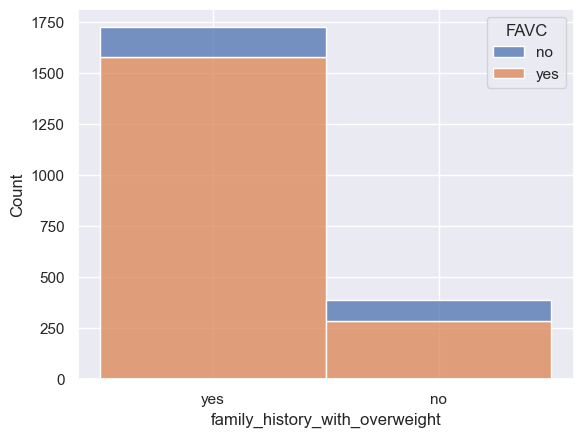

In [168]:
# FAVC - Frequent consumption of high caloric food
sns.histplot(data=df, x=RESPONSE_VAR, hue=CATEGORICAL_VAR, stat="count", multiple="stack")

<Axes: xlabel='family_history_with_overweight', ylabel='FCVC'>

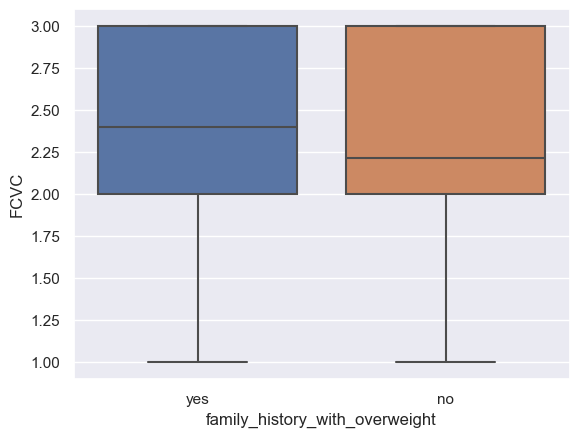

In [169]:
# FCVC - Frequent consumption of vegetables
sns.boxplot(data=df, x=RESPONSE_VAR, y='FCVC')

<Axes: xlabel='family_history_with_overweight', ylabel='NCP'>

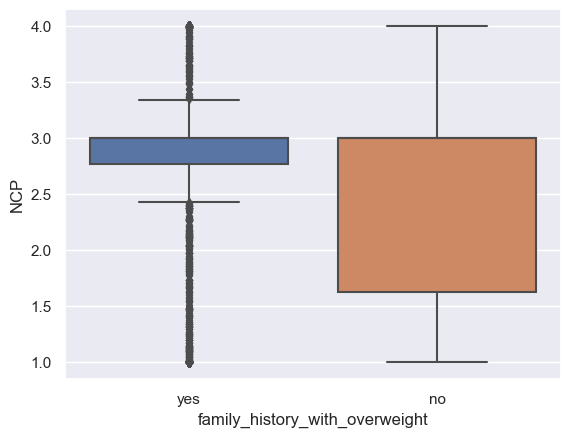

In [170]:
# NCP - Number of main meals
sns.boxplot(data=df, x=RESPONSE_VAR, y='NCP')

<Axes: xlabel='family_history_with_overweight', ylabel='FAF'>

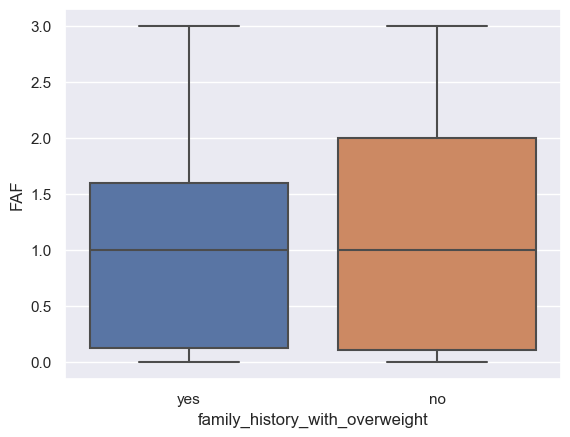

In [171]:
# FAF - Physical activity frequency
sns.boxplot(data=df, x=RESPONSE_VAR, y='FAF')

<Axes: xlabel='family_history_with_overweight', ylabel='Weight'>

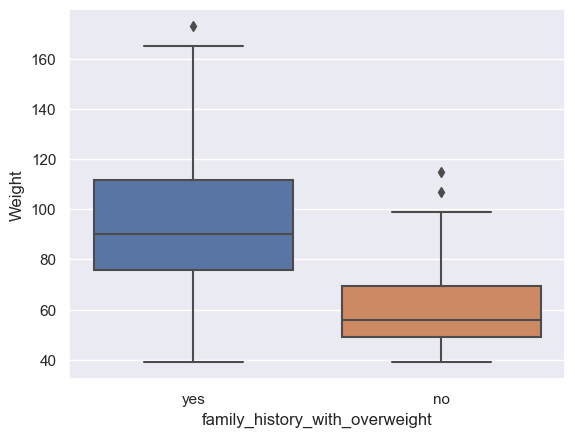

In [172]:
# Weight
sns.boxplot(data=df, x=RESPONSE_VAR, y='Weight')

----

**Relationships between explanatory variable pairs**

<Axes: xlabel='FAVC', ylabel='FCVC'>

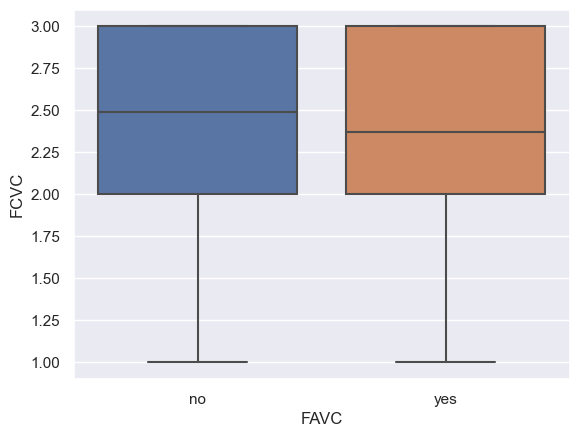

In [173]:
# FAVC (Frequent consumption of high caloric food) vs FCVC (Frequent consumption of vegetables)
sns.boxplot(data=df, x='FAVC', y='FCVC')

<Axes: xlabel='FAVC', ylabel='NCP'>

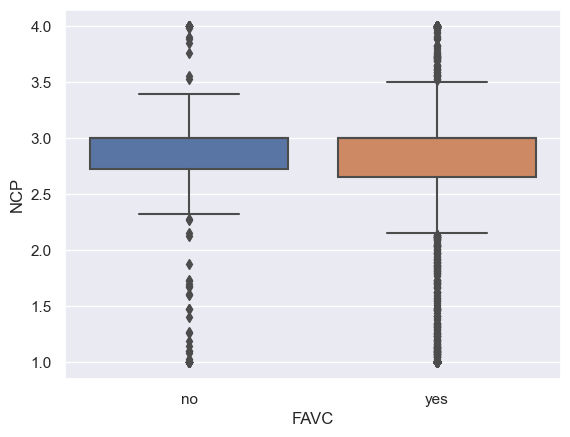

In [174]:
# FAVC (Frequent consumption of high caloric food) vs NCP (Number of main meals)
sns.boxplot(data=df, x='FAVC', y='NCP')

<Axes: xlabel='FAVC', ylabel='FAF'>

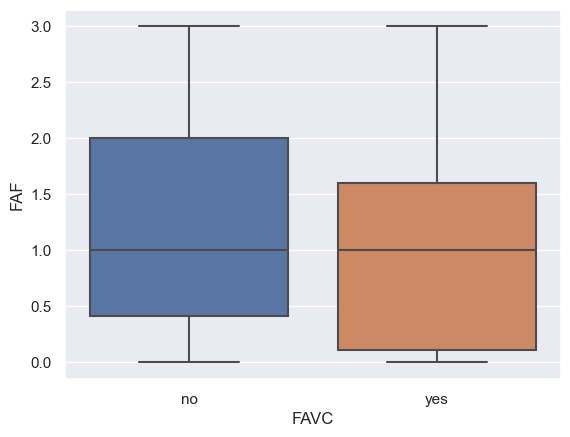

In [175]:
# FAVC (Frequent consumption of high caloric food) vs FAF (Physical activity frequency)
sns.boxplot(data=df, x='FAVC', y='FAF')

<Axes: xlabel='FAVC', ylabel='Weight'>

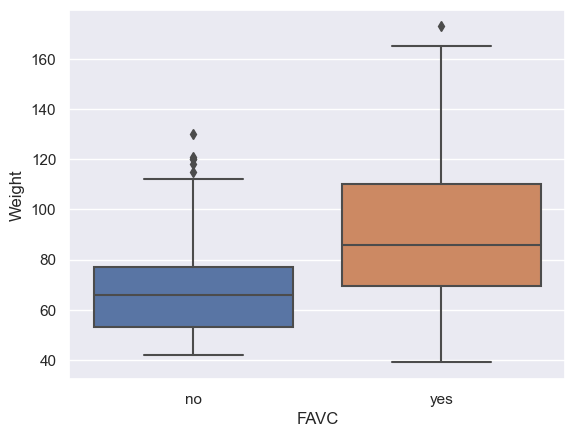

In [176]:
# FAVC (Frequent consumption of high caloric food) vs Weight
sns.boxplot(data=df, x='FAVC', y='Weight')

<Axes: xlabel='FCVC', ylabel='NCP'>

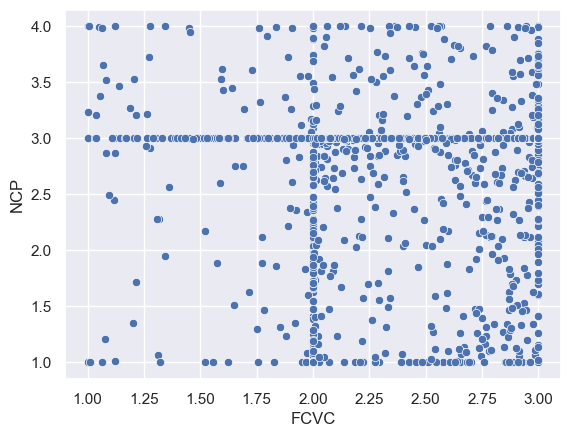

In [177]:
# FCVC (Frequent consumption of vegetables) vs NCP (Number of main meals)
sns.scatterplot(data=df, x='FCVC', y='NCP')

<Axes: xlabel='FCVC', ylabel='FAF'>

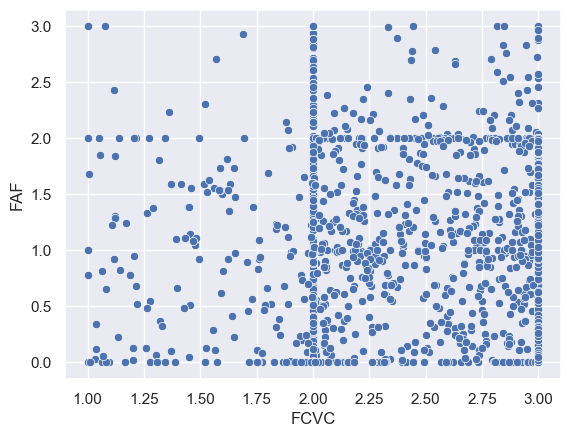

In [178]:
# FCVC (Frequent consumption of vegetables) vs FAF (Physical activity frequency)
sns.scatterplot(data=df, x='FCVC', y='FAF')

<Axes: xlabel='FCVC', ylabel='Weight'>

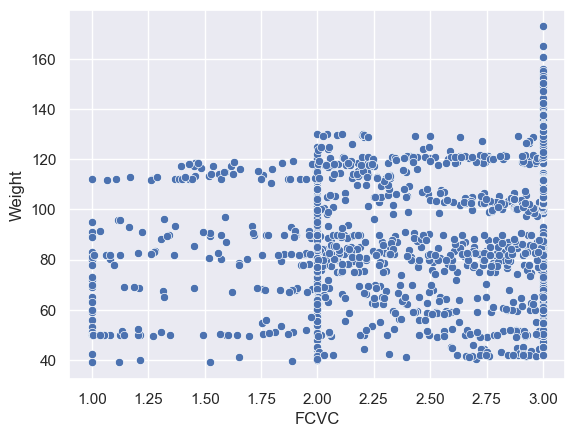

In [179]:
# FCVC (Frequent consumption of vegetables) vs Weight
sns.scatterplot(data=df, x='FCVC', y='Weight')

<Axes: xlabel='NCP', ylabel='FAF'>

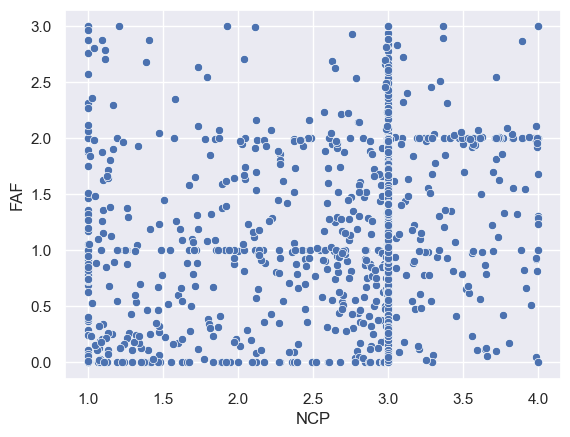

In [180]:
# NCP (Number of main meals) vs FAF (Physical activity frequency)
sns.scatterplot(data=df, x='NCP', y='FAF')

<Axes: xlabel='NCP', ylabel='Weight'>

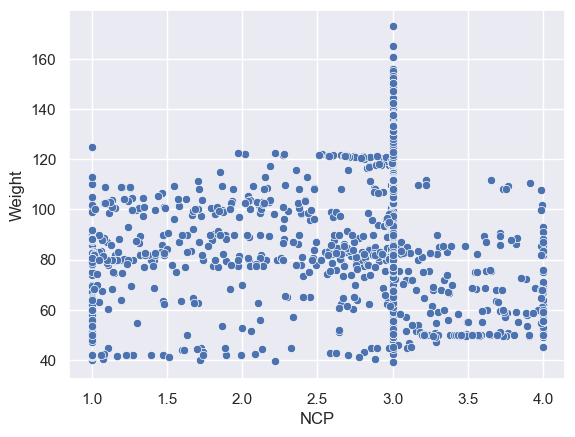

In [181]:
# NCP (Number of main meals) vs Weight
sns.scatterplot(data=df, x='NCP', y='Weight')

<Axes: xlabel='FAF', ylabel='Weight'>

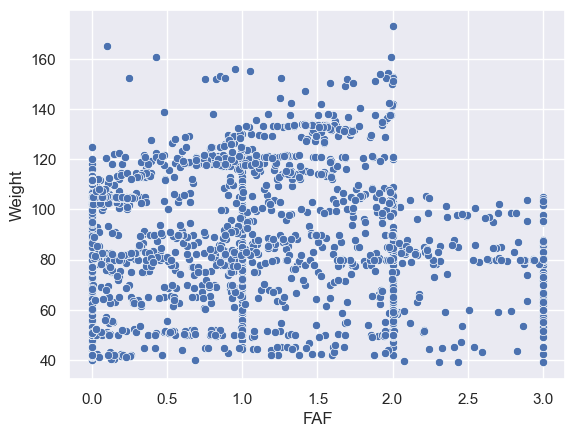

In [182]:
# FAF (Physical activity frequency) vs Weight
sns.scatterplot(data=df, x='FAF', y='Weight')

In [183]:
df[NUMERICAL_VARS].corr()

,FCVC,NCP,FAF,Weight
FCVC,1.000000,0.042216,0.019939,0.216125
NCP,0.042216,1.000000,0.129504,0.107469
FAF,0.019939,0.129504,1.000000,-0.051436
Weight,0.216125,0.107469,-0.051436,1.000000


----

**Interaction effects**

In [184]:
# creating 0/1 indicator variables
df[RESPONSE_VAR] = df[RESPONSE_VAR].replace({'yes':1, 'no':0})
df[CATEGORICAL_VAR] = df[CATEGORICAL_VAR].replace({'yes':1, 'no':0})

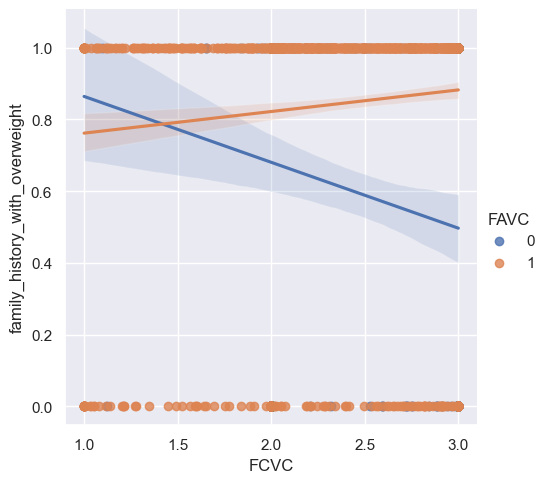

In [185]:
# FAVC (Frequent consumption of high caloric food) vs FCVC (Frequent consumption of vegetables)
sns.lmplot(data=df, hue='FAVC', x='FCVC', y=RESPONSE_VAR)

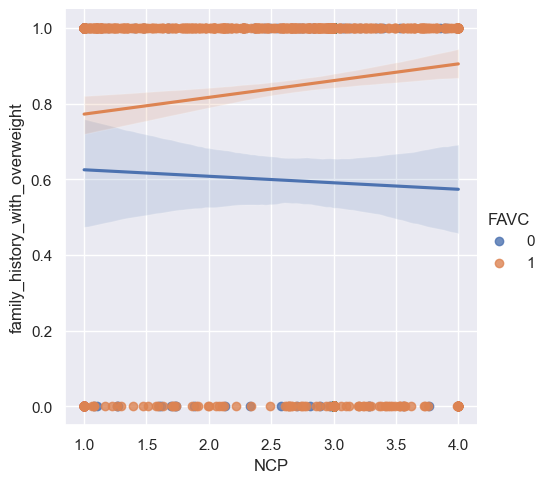

In [186]:
# FAVC (Frequent consumption of high caloric food) vs NCP (Number of main meals)
sns.lmplot(data=df, hue='FAVC', x='NCP', y=RESPONSE_VAR)

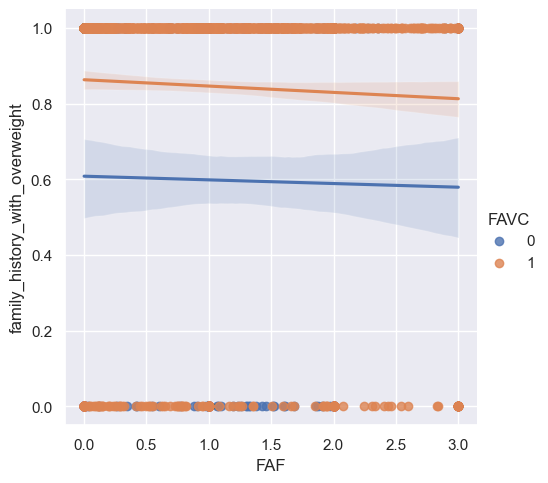

In [187]:
# FAVC (Frequent consumption of high caloric food) vs FAF (Physical activity frequency)
sns.lmplot(data=df, hue='FAVC', x='FAF', y=RESPONSE_VAR)

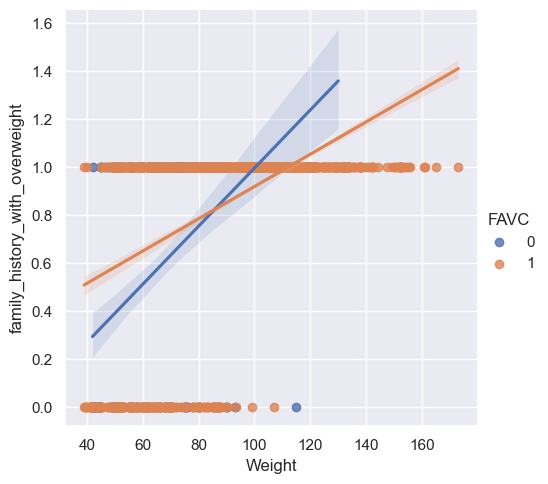

In [188]:
# FAVC (Frequent consumption of high caloric food) vs Weight
sns.lmplot(data=df, hue='FAVC', x='Weight', y=RESPONSE_VAR)

## 5. Model Data Preprocessing

## 6. Feature Selection with k-Fold Cross-Validation

## 7. Best Model Discussion

## 8. Additional Analysis/Insight

## 9. Conclusion

## References